<a href="https://colab.research.google.com/github/kzeynep/Python_Atil_hoca/blob/main/irisdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Veri Setine Genel Bakış

In [83]:
df = pd.read_csv('11-iris.csv')

In [84]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [85]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [86]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [87]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [88]:
df.shape

(150, 6)

In [89]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [90]:
df.loc[0]

,0
Id,1
SepalLengthCm,5.1
SepalWidthCm,3.5
PetalLengthCm,1.4
PetalWidthCm,0.2
Species,Iris-setosa


In [91]:
df.iloc[1]

,1
Id,2
SepalLengthCm,4.9
SepalWidthCm,3.0
PetalLengthCm,1.4
PetalWidthCm,0.2
Species,Iris-setosa


In [92]:
df.shape

(150, 6)

In [93]:
df = sns.load_dataset("iris")
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [94]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [95]:
df['species'].value_counts() #her türden kaç tane var

,count
species,
setosa,50
versicolor,50
virginica,50


# 2. Veri Tipleri ve Eksik Değer Kontrolü

In [96]:
df.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


In [97]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [98]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


<Axes: >

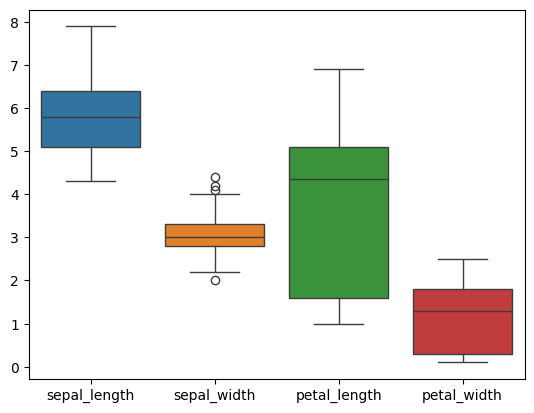

In [99]:
sns.boxplot(df)

Text(0, 0.5, 'Sepal_Length')

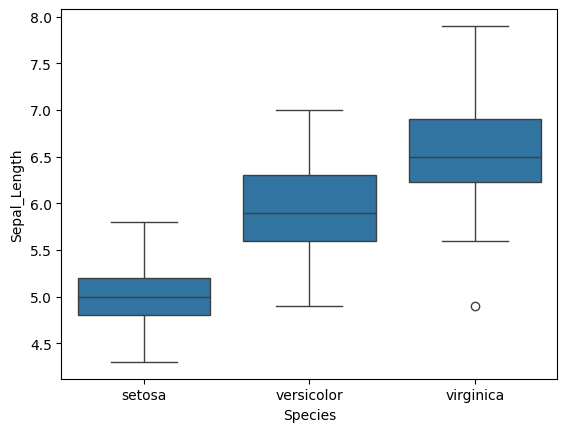

In [100]:
sns.boxplot(x="species", y="sepal_length", data=df)
plt.xlabel('Species')
plt.ylabel('Sepal_Length')

Text(0, 0.5, 'Petal_width')

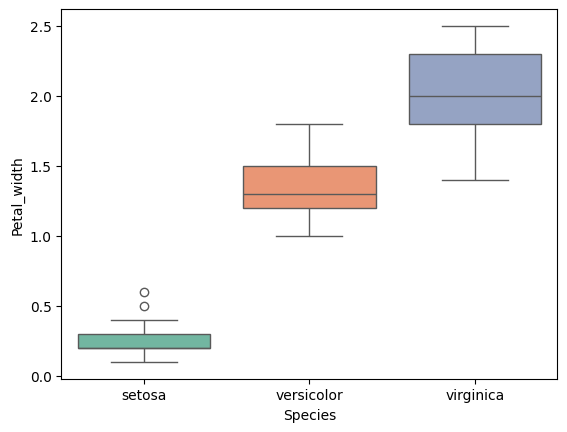

In [101]:
sns.boxplot(x="species", y="petal_width", data=df, palette="Set2")
plt.xlabel('Species')
plt.ylabel('Petal_width')

Text(0, 0.5, 'Petal_width')

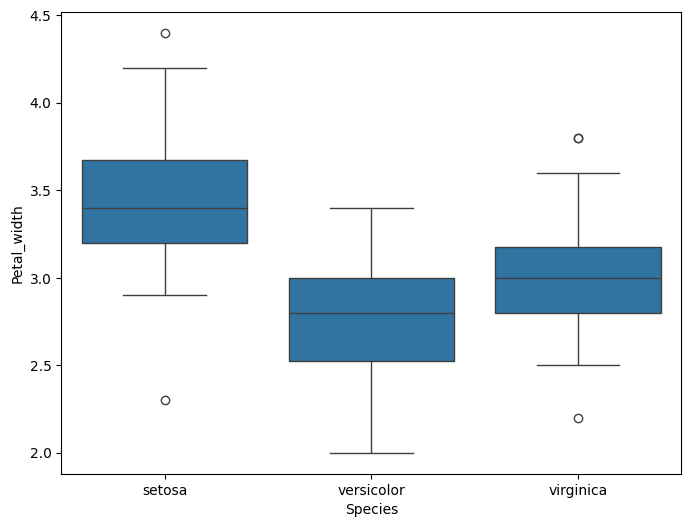

In [102]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="species", y="sepal_width", data=df)
plt.xlabel('Species')
plt.ylabel('Petal_width')

<Axes: xlabel='species', ylabel='petal_length'>

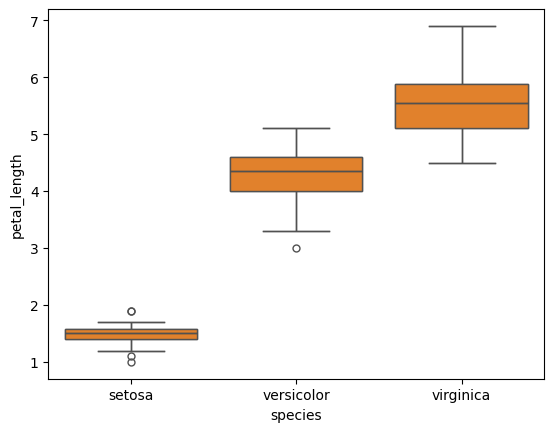

In [103]:
sns.boxplot(x="species", y="petal_length", data=df, showfliers=False)  # gizler
sns.boxplot(x="species", y="petal_length", data=df, flierprops={"marker":"o", "color":"red", "markersize":5})  # özelleştirir

<Axes: xlabel='sepal_length', ylabel='species'>

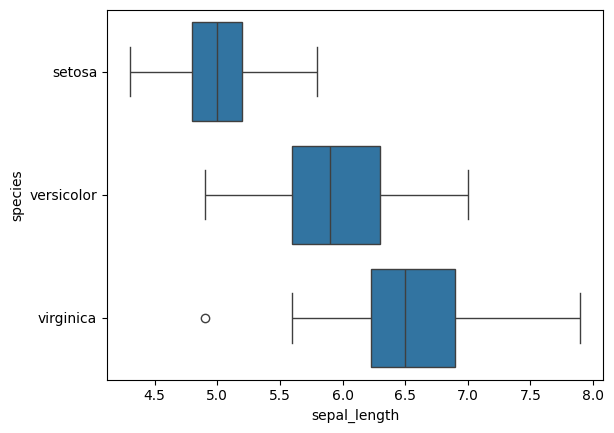

In [104]:
sns.boxplot(y="species", x="sepal_length", data=df)

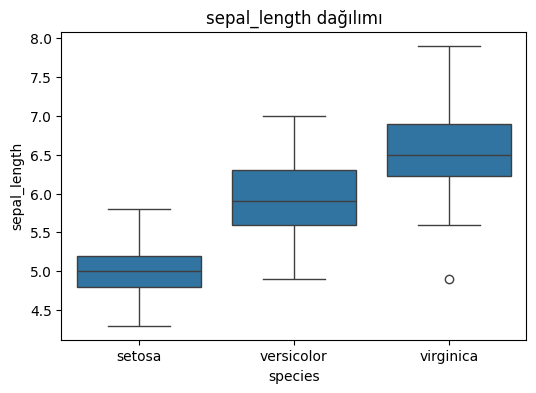

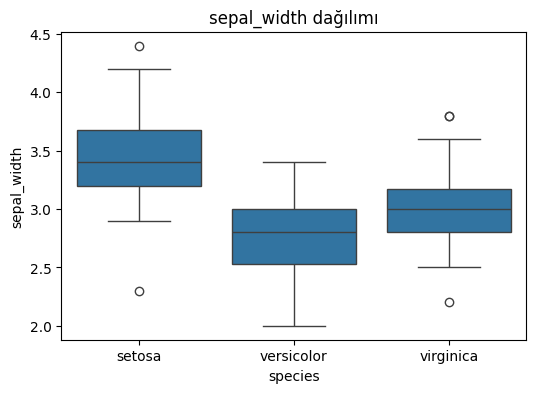

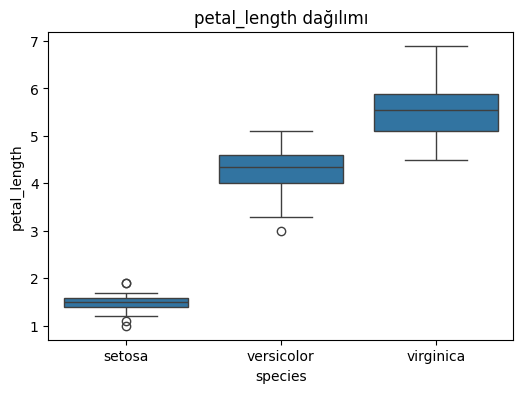

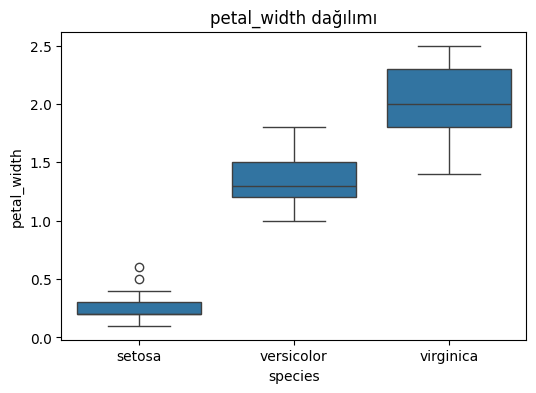

In [105]:
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="species", y=feature, data=df)
    plt.title(f"{feature} dağılımı")
    plt.show()

# 3. Temel İstatistiksel Özellikler

In [106]:
df.mean

<bound method DataFrame.mean of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [107]:
df.median

<bound method DataFrame.median of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [108]:
df.mode

<bound method DataFrame.mode of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [109]:
df.std

<bound method DataFrame.std of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [110]:
df.var

<bound method DataFrame.var of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [111]:
df.min

<bound method DataFrame.min of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [112]:
df.max

<bound method DataFrame.max of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [113]:
df.groupby("species").agg(lambda x: x.mode().iloc[0])

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.4,0.2
versicolor,5.5,3.0,4.5,1.3
virginica,6.3,3.0,5.1,1.8


In [114]:
Q1 = df.groupby("species").quantile(0.25)
Q3 = df.groupby("species").quantile(0.75)
IQR = Q3 - Q1

In [115]:
df.describe()
df.groupby("species").describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [116]:
df.select_dtypes(include="number").corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [117]:
df.groupby("species")

In [118]:
df.select_dtypes(include="number").std(ddof=1)

,0
sepal_length,0.828066
sepal_width,0.435866
petal_length,1.765298
petal_width,0.762238


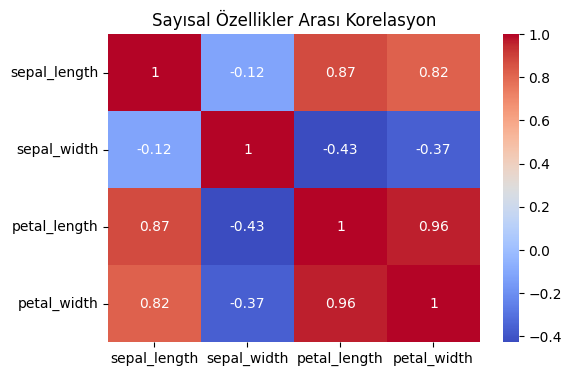

In [119]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, cmap="coolwarm")
plt.title("Sayısal Özellikler Arası Korelasyon")
plt.show()

# 4. Görselleştirme ile Keşifsel Veri Analizi (EDA)

# 4.1. Histogramlar: Her Özelliğin Dağılımı

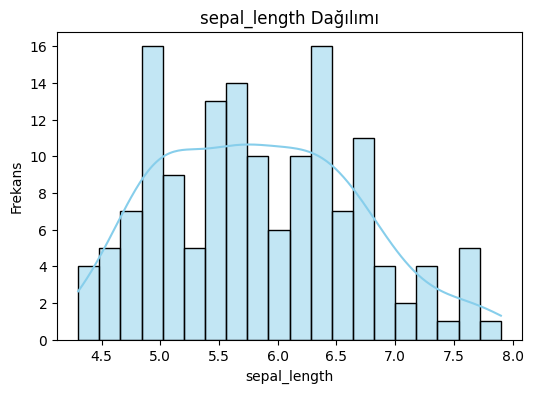

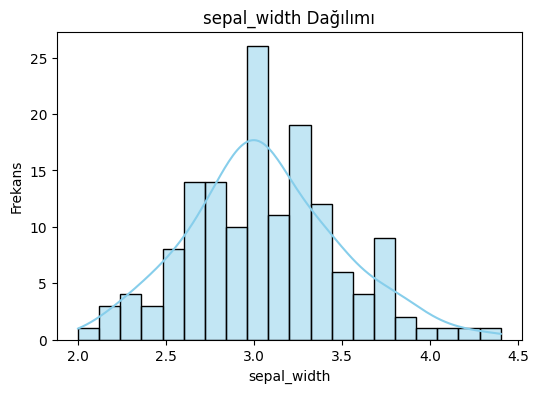

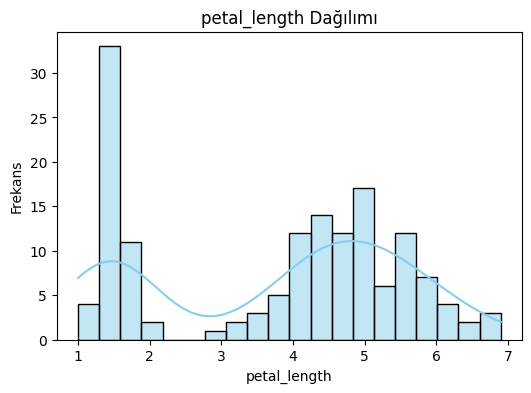

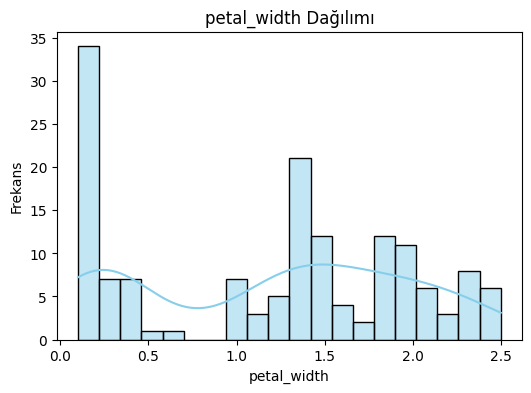

In [120]:
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, kde=True, bins=20, color="skyblue")
    plt.title(f"{feature} Dağılımı")
    plt.xlabel(feature)
    plt.ylabel("Frekans")
    plt.show()

# 4.2. Boxplot: Türlere Göre Karşılaştırmalar

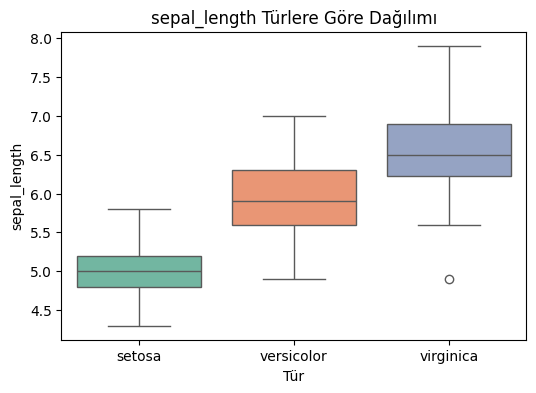

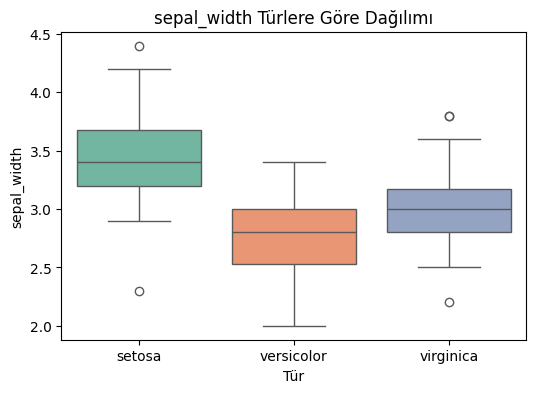

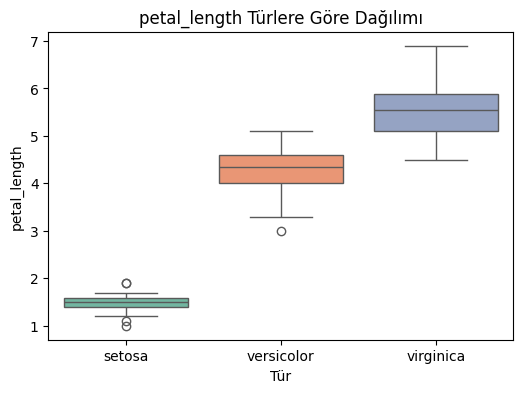

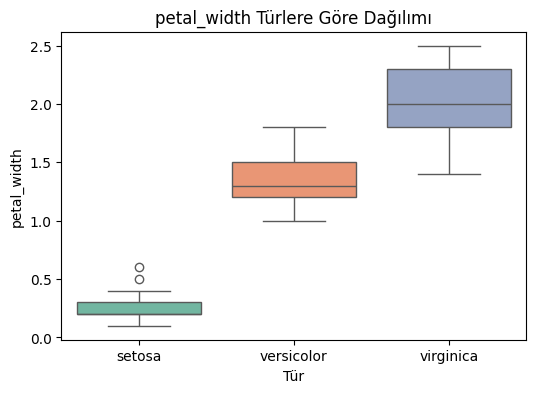

In [121]:
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="species", y=feature, data=df, palette="Set2")
    plt.title(f"{feature} Türlere Göre Dağılımı")
    plt.xlabel("Tür")
    plt.ylabel(feature)
    plt.show()

# 4. 3. Pairplot: Özellikler Arası İlişkiler

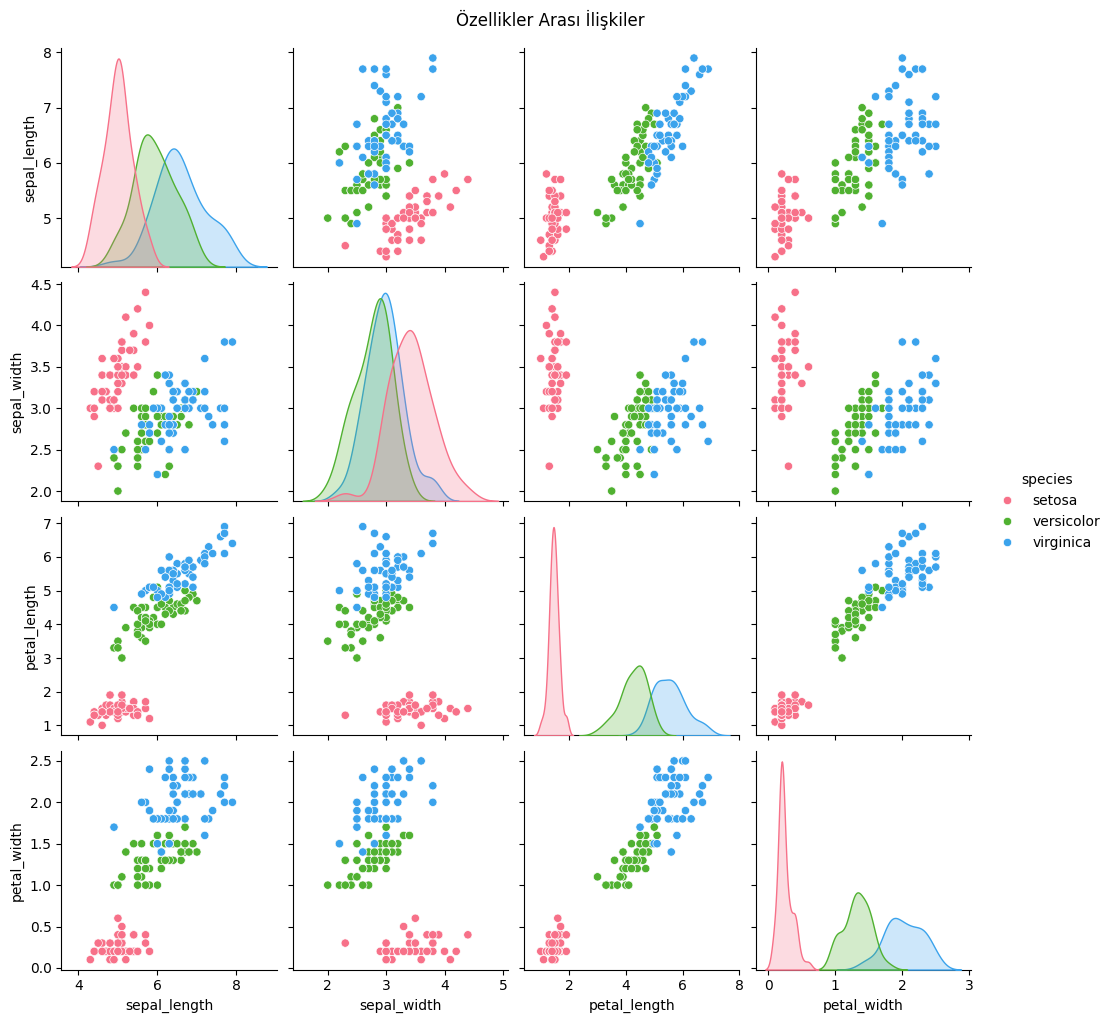

In [122]:
sns.pairplot(df, hue="species", palette="husl", diag_kind="kde", height=2.5)
plt.suptitle("Özellikler Arası İlişkiler", y=1.02)
plt.show()

# 4.4. Korelasyon Matrisi ve Isı Haritası

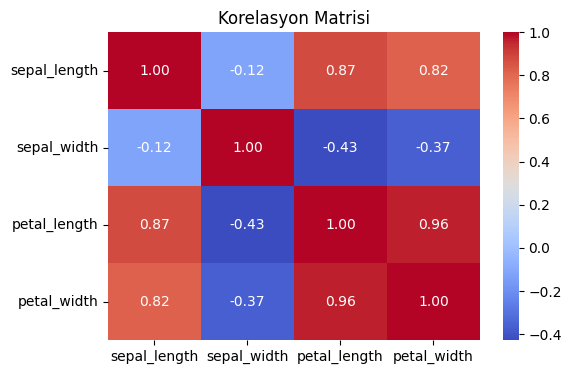

In [123]:
plt.figure(figsize=(6, 4))
corr_matrix = df.select_dtypes(include="number").corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

# 5. Türlere Göre Özellik Karşılaştırmaları


# 5.1. Türlere Göre Ortalama ve Dağılım Karşılaştırması


In [124]:
df.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


# 5.2. Boxplot ile Görsel Karşılaştırma


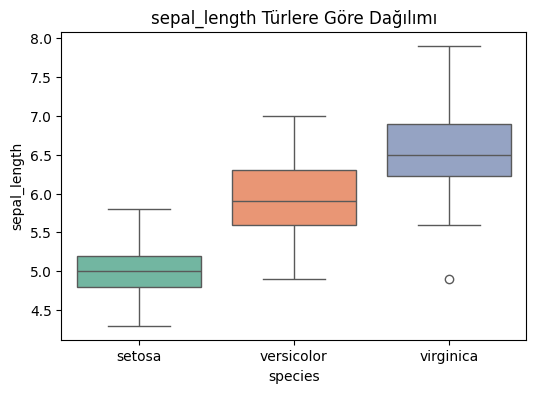

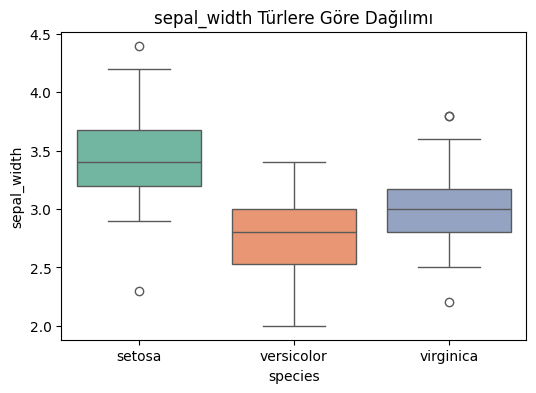

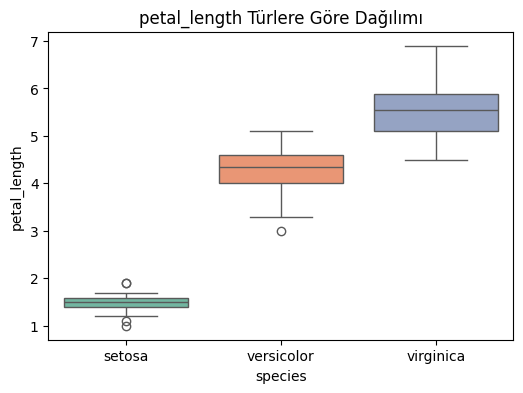

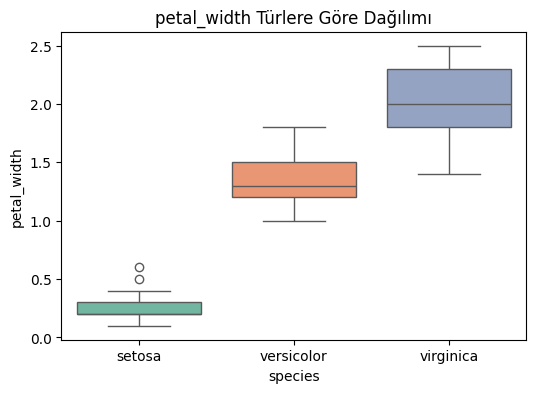

In [125]:
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="species", y=feature, data=df, palette="Set2")
    plt.title(f"{feature} Türlere Göre Dağılımı")
    plt.show()

# 5.3. Pairplot ile Özellikler Arası Tür Ayrımı


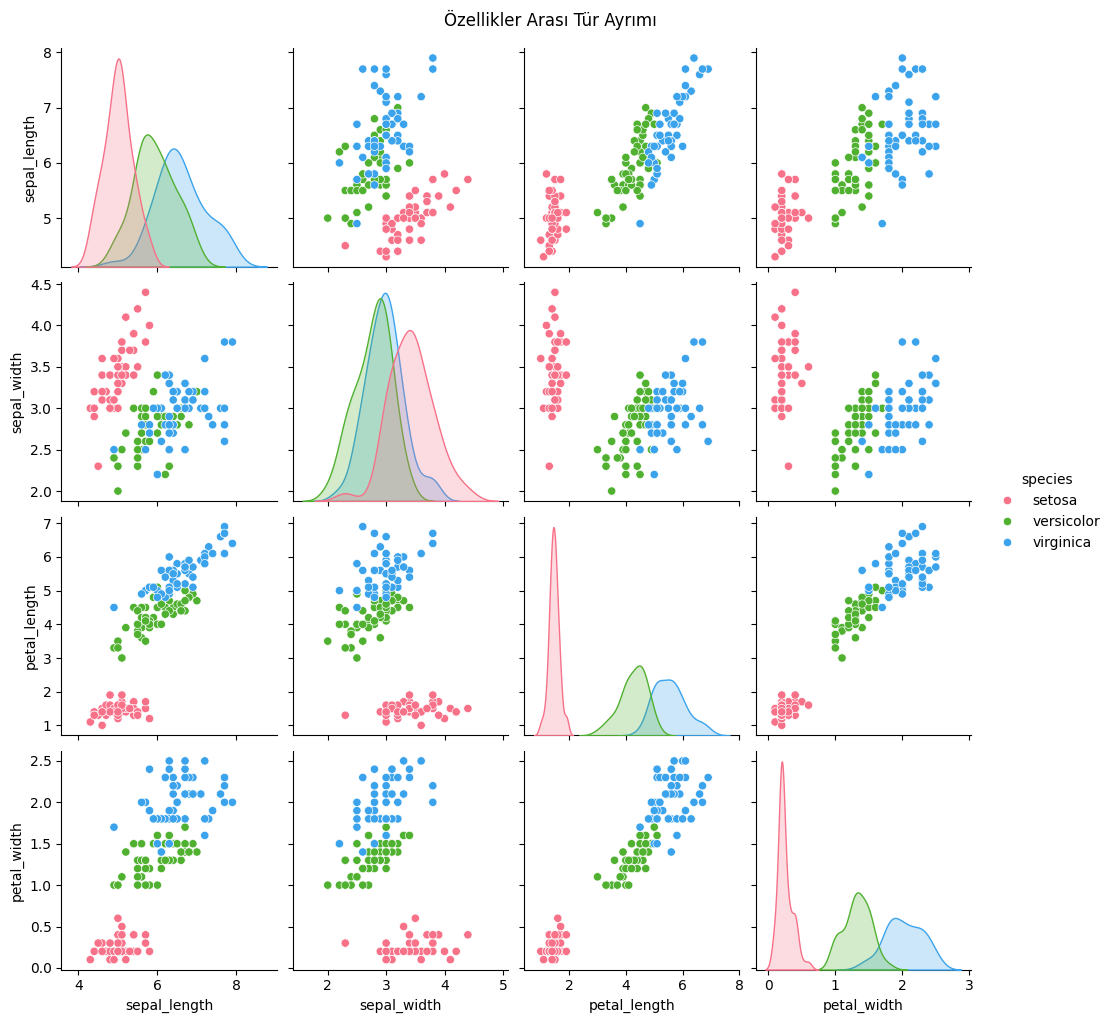

In [126]:
sns.pairplot(df, hue="species", palette="husl", diag_kind="kde", height=2.5)
plt.suptitle("Özellikler Arası Tür Ayrımı", y=1.02)
plt.show()

# 5.4. Korelasyon Matrisi ile Bilgilendirici Özellikleri Belirleme


In [127]:
corr_matrix = df.select_dtypes(include="number").corr()
print(corr_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


# 5.5. Scatter Plot ile Özellik Çiftlerini Karşılaştırma


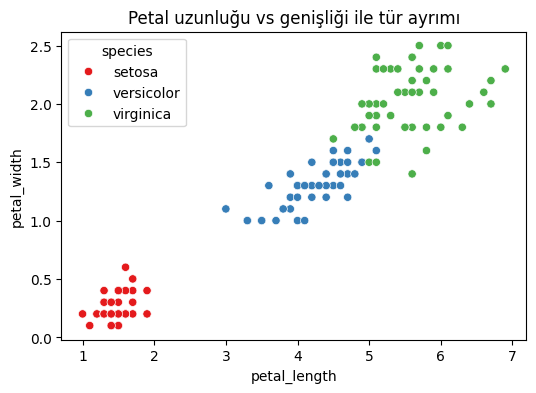

In [128]:
plt.figure(figsize=(6,4))
sns.scatterplot(data = df,x="petal_length",y="petal_width",hue="species",palette="Set1")
plt.title("Petal uzunluğu vs genişliği ile tür ayrımı")
plt.show()

# 6. Özellikler Arası İlişkiler

# 6. 1. Scatter Plot ile Özellik Çiftlerini Karşılaştırma


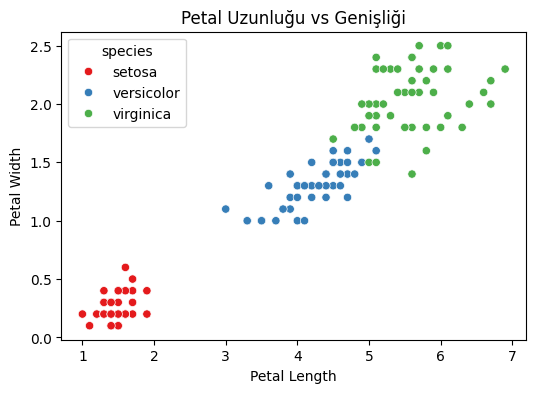

In [129]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species", palette="Set1")
plt.title("Petal Uzunluğu vs Genişliği")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

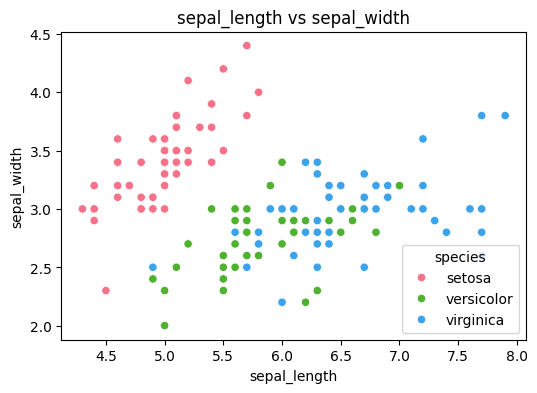

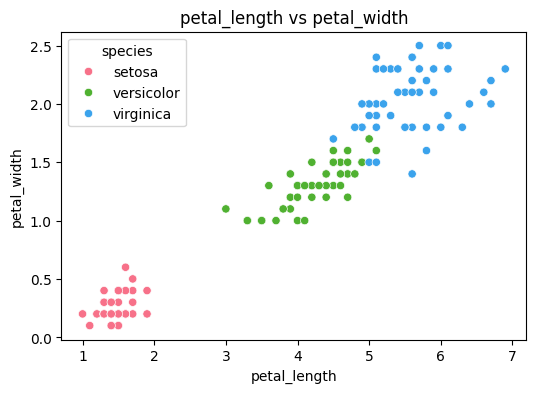

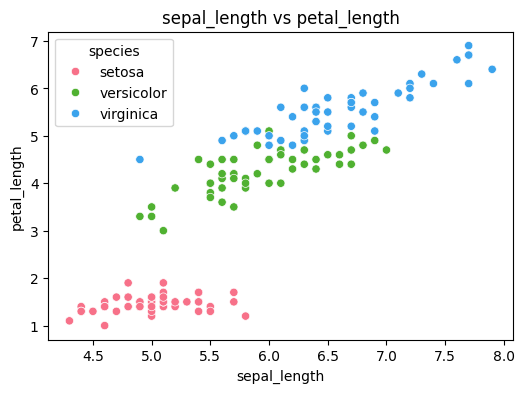

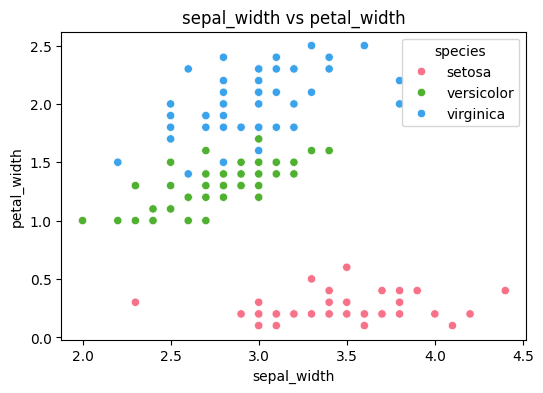

In [130]:
feature_pairs = [("sepal_length", "sepal_width"),
                 ("petal_length", "petal_width"),
                 ("sepal_length", "petal_length"),
                 ("sepal_width", "petal_width")]

for x, y in feature_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=x, y=y, hue="species", palette="husl")
    plt.title(f"{x} vs {y}")
    plt.show()

# 6.2. Korelasyon Katsayıları Hesaplama


In [131]:
corr_matrix= df.select_dtypes(include="number").corr()
print(corr_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


# 6.3. Korelasyon Isı Haritası (Heatmap)


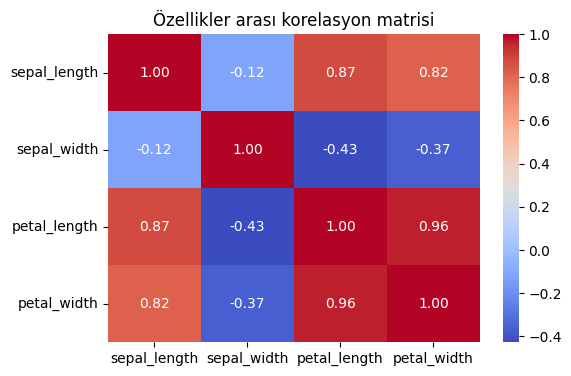

In [132]:
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Özellikler arası korelasyon matrisi")
plt.show()

# 6.4.Lineerlik ve Kümelenme Yorumlama

# 6.4.1. Petal Uzunluğu vs Petal Genişliği Scatter Plot

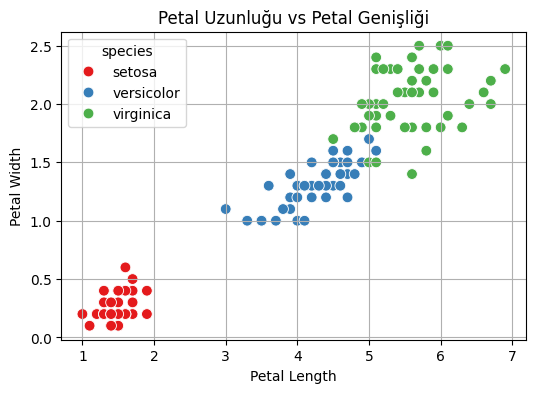

In [133]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species", palette="Set1", s=60)
plt.title("Petal Uzunluğu vs Petal Genişliği")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.grid(True)
plt.show()

**Açıklamalı Yorum**

• 	Lineerlik:
 "petal_length" ile "petal_with" arasında pozitif doğrusal ilişki vardır. Yani petal uzunluğu arttıkça genişliği de artar. Noktalar bir çizgi etrafında sıralanır.

• 	Kümelenme:

• 	Setosa türü (genellikle kırmızı): Sol alt köşede ayrı bir küme oluşturur. Petal uzunluğu ve genişliği çok küçük.

• 	Versicolor ve Virginica türleri: Daha büyük petal ölçülerine sahip. Birbirine yakın ama Virginica genellikle daha büyük değerlere sahiptir.

• 	Bu iki tür arasında da ayrım yapılabilir ama Setosa kadar net değildir.

# 6.4.2. Sepal Uzunluğu vs Sepal Genişliği Scatter Plot


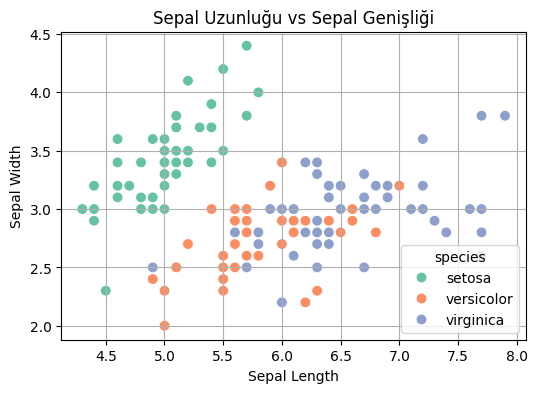

In [134]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species", palette="Set2", s=60)
plt.title("Sepal Uzunluğu vs Sepal Genişliği")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.grid(True)
plt.show()

**Yorum**

• 	Bu grafikte türler arasındaki ayrım daha belirsizdir.

• 	Setosa yine biraz ayrışır ama Versicolor ve Virginica iç içe geçmiş olabilir.

• 	Bu nedenle petal özellikleri, türleri ayırmada daha etkilidir.

# 7. Veri Setinden Çıkarımlar

# Yeni Bölüm
# 7.1. Petal Özellikleri Türleri Ayırmada Daha Etkili
- **petal_length ve petal_width, türler arasında belirgin farklar gösteriyor.**

- **Scatter plot ve boxplot görsellerinde Setosa türü net şekilde ayrışırken, Versicolor ve Virginica daha yakın ama yine de ayırt edilebilir.**

# 7.2. Sepal Özellikleri Daha Az Ayırt Edici

- **sepal_length ve sepal_width değerleri türler arasında daha iç içe geçmiş durumda.**

- **Bu nedenle petal özellikleri, türleri sınıflandırmak için daha bilgilendirici.**

# 7.3. Özellikler Arasında Güçlü Korelasyonlar Var

- **petal_length ile petal_width arasında yüksek pozitif korelasyon gözlemlendi.**
  
- **Bu ilişki scatter plot’ta doğrusal bir yapı olarak kendini gösterdi.**

# 7.4. Setosa Türü Aykırı Değerlerden Uzak, Net Bir Küme


- **Boxplot’larda Setosa türü genellikle daha dar bir dağılım gösteriyor.**
  
- **Bu da onu diğer türlerden ayırmayı kolaylaştırıyor.**

#  7.5. Veri Seti Temiz ve Dengeli

- **Eksik değer bulunmuyor.**
  
- **Her türden eşit sayıda gözlem var (50’şer adet).**

  
- **Sayısal sütunlar istatistiksel analiz için uygun.**

  

# ✨ Sonuç


**Bu analiz, Iris veri setinin sadece görselleştirme ve istatistiksel yöntemlerle bile ne kadar öğretici olduğunu gösteriyor. Makine öğrenmesi kullanmadan da veriyle anlamlı bir ilişki kurmak mümkün. Özellikle eğitim ve içerik üretimi için bu tarz veri setleri, hem teknik hem pedagojik açıdan büyük fırsatlar sunuyor.**

In [135]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [136]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [137]:
from sklearn.preprocessing import LabelEncoder

In [138]:
label_encoder = LabelEncoder()
df["species"] = label_encoder.fit_transform(df["species"])

In [139]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [140]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [141]:
df["species"].value_counts()

,count
species,
0,50
1,50
2,50


In [142]:
X = df.drop("species", axis=1)
y = df["species"]

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
from sklearn.preprocessing import StandardScaler

In [146]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [147]:
from sklearn.naive_bayes import GaussianNB

In [148]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

GaussianNB()

In [149]:
y_pred = gnb.predict(X_test_scaled)

In [150]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [151]:
print("confusion matrix: \n", confusion_matrix(y_pred, y_test))
print("accuracy score: ", accuracy_score(y_pred, y_test))
print("classification report: ", classification_report(y_pred, y_test))

confusion matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy score:  1.0
classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [152]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [153]:
X = df.drop("species", axis=1)
y = df["species"]

In [154]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.3076923076923077, 0.9285714285714286, 'petal_length <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'petal_length <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'petal_width <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'petal_width <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'petal_length <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'g

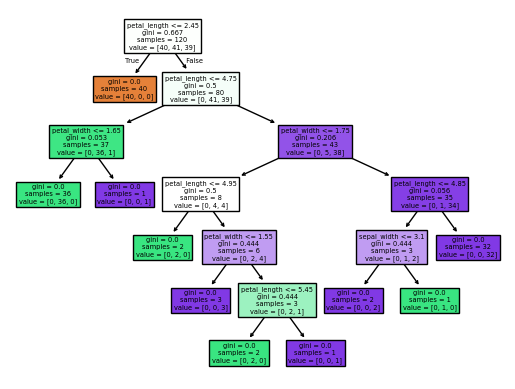

In [156]:
from sklearn import tree
tree.plot_tree(tree_model.fit(X_train, y_train),feature_names =X_train.columns , filled = True)

In [157]:
y_pred = tree_model.predict(X_test)
print("confusion matrix: \n", confusion_matrix(y_pred, y_test))
print("accuracy score: ", accuracy_score(y_pred, y_test))
print("classification report: ", classification_report(y_pred, y_test))

confusion matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy score:  1.0
classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [158]:
tree_model = DecisionTreeClassifier(random_state=42, max_depth=3)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
print("confusion matrix: \n", confusion_matrix(y_pred, y_test))
print("accuracy score: ", accuracy_score(y_pred, y_test))
print("classification report: ", classification_report(y_pred, y_test))

confusion matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy score:  1.0
classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

